<a href="https://colab.research.google.com/github/AbrahamKong/CMPE255-Various_Clustering/blob/main/CMPE_255_Various_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**K-Means clustering from scratch**

In [ ]:
# Import necessary library

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

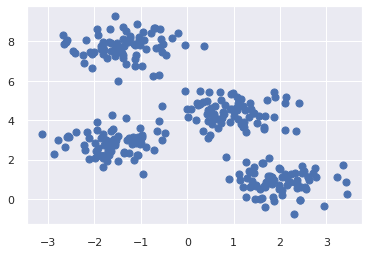

In [ ]:
# Create Data for testing

from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

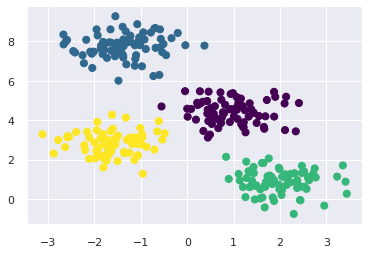

In [ ]:
# K-Means from scratch, get from the hint file

from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

# By eye balling the data, decides the data can be group to 4 clusters
centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

**Hierarchical clustering**

['setosa' 'versicolor' 'virginica']


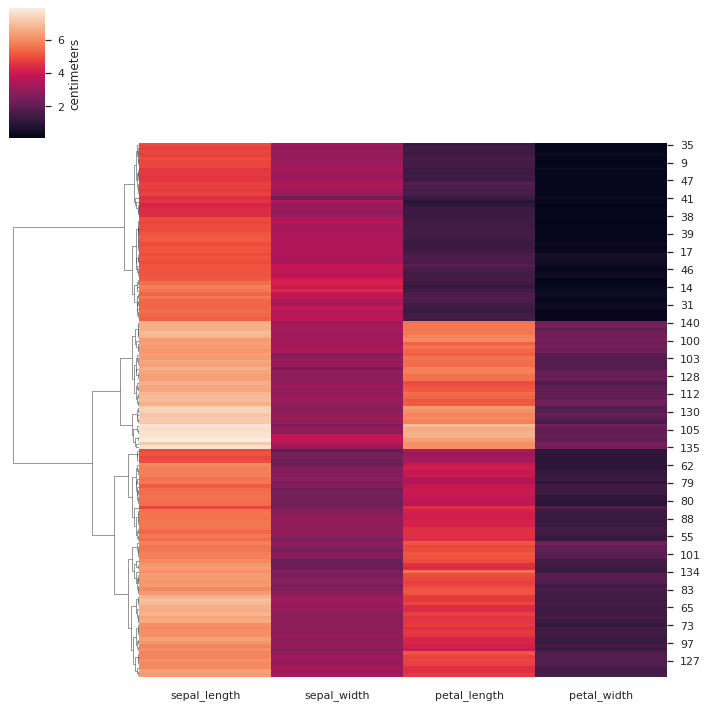

In [ ]:
# Use guildence from hints to build dendogram based on the iris dataset

sns.set(color_codes=True)
iris = sns.load_dataset("iris")

# Remove the species column
species = iris.pop("species")

# The samples seems to be from these three species
print(species.unique())

# Cluster only the rows
sns.clustermap(iris, method="ward", col_cluster=False, cbar_kws={'label': 'centimeters'});

**Gaussian mixture models clustering**

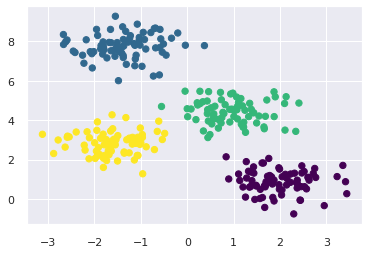

In [ ]:
# Import library

from sklearn import mixture

# Based on previouse data set, set components to 4
gmm = mixture.GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)

# scatter the clustering
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [ ]:
# Find the probablity of any given point that is cluster to the given cluster
# Out put in a matrix

probs = gmm.predict_proba(X)
print(probs[:5].round(3))

[[0.972 0.    0.026 0.002]
 [0.    1.    0.    0.   ]
 [0.    0.    1.    0.   ]
 [0.    1.    0.    0.   ]
 [0.999 0.    0.001 0.   ]]


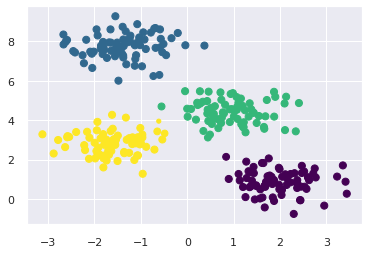

In [ ]:
# Visualize the uncertanty of the cluster

# square emphasizes differences
size = 50 * probs.max(1) ** 2
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size);

**DB Scan clustering using pycaret library**

In [ ]:
!pip install pycaret

     |████████████████████████████████| 288 kB 35.0 MB/s 
     |████████████████████████████████| 261 kB 38.2 MB/s 
     |████████████████████████████████| 167 kB 56.4 MB/s 
     |████████████████████████████████| 86 kB 6.4 MB/s 
     |████████████████████████████████| 56 kB 5.5 MB/s 
     |████████████████████████████████| 15.5 MB 39.1 MB/s 
     |████████████████████████████████| 113 kB 60.8 MB/s 
     |████████████████████████████████| 2.0 MB 45.5 MB/s 
     |████████████████████████████████| 6.8 MB 41.4 MB/s 
     |████████████████████████████████| 1.7 MB 35.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.3 MB 42.4 MB/s 
     |████████████████████████████████| 3.1 MB 42.9 MB/s 
     |████████████████████████████████| 303 kB 65.1 MB/s 
     |████████████████████████████████| 675 kB 14.9 MB/s 
     |████████████████

In [ ]:
# check version
from pycaret.utils import version
version()

'2.3.5'

In [ ]:
# Load Data set

from pycaret.datasets import get_data
data = get_data('public_health')

,Country Name,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Arab World,2.004868,2.014602,2.071309,2.177712,2.331000,2.333596,2.588751,2.540238,2.450415,2.314914,2.134281,2.133038,2.166872,2.101233,2.830067,2.489631,2.539570,2.711262,2.895427,3.073161
1,Caribbean small states,2.801518,2.856684,2.997157,2.989451,2.767858,2.826752,2.679969,2.888693,2.740593,2.845971,2.629580,2.650900,2.790665,2.822913,3.408651,3.264064,3.087653,3.314303,3.318432,3.260012
2,Central Europe and the Baltics,4.678528,4.753209,4.604574,4.499988,4.679082,4.539711,4.666272,4.900196,5.100249,4.913629,4.970861,4.841450,4.809057,5.054785,5.394921,5.284380,5.096212,5.041317,5.029266,5.017717
3,Early-demographic dividend,2.203164,2.156632,2.227311,2.364100,2.454394,2.450555,2.527081,2.347702,2.363263,2.346824,2.337347,2.369884,2.385251,2.405126,2.701260,2.507131,2.495491,2.497340,2.586701,2.665603
4,East Asia & Pacific,4.429090,4.203152,4.244351,4.453984,4.626920,4.688849,4.684790,4.613537,4.635098,4.626696,4.566215,4.367146,4.297394,4.434848,4.865241,4.775817,4.871727,4.866869,4.643221,4.571448


In [ ]:
# Initialize Set up

from pycaret.clustering import *

In [ ]:
clu1 = setup(data, ignore_features = ['Country Name'], session_id=123, log_experiment=True, log_plots = True, 
             experiment_name='health1')

,Description,Value
0,session_id,123
1,Original Data,"(224, 21)"
2,Missing Values,False
3,Numeric Features,20
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(224, 20)"
9,CPU Jobs,-1


In [ ]:
# Create Models

models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


In [ ]:
# Create model based on Density-based spatial clustering

dbscan = create_model('dbscan', num_clusters = 4)
plot_model(dbscan)